# 1. Problem formulation

### Problem description

Intrusion Detection System is software used to detect network intrusions using various machine learning algorithms.IDS monitors a network or system for malicious activity and protects a computer network from unauthorised access by users, including perhaps insiders.


### Model description

The task of learning an intrusion detector is to build a predictive model (i.e. a classifier) capable of distinguishing between "bad connections" (intrusions/attacks) and "good" (normal) connections. The model will be tasked with appropriately classifying the results as safe and unsafe connections. Regression of the model on the independent variables should allow estimation of the outcome. In Bayesian terms, the uncertainty of the results obtained by the model should be described by a normal distribution. Thus, the purpose of the model should be to describe the uncertainty in the form of a prediction to solve the problem. 


### Where the data comes from?

The data which is used in our project comes from [KDD Cup '99](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) portal. It includes information about connections between user and network. It includes information on both hackers and ordinary users like duration, protocol type, service, source bytes, attack type etc.


### Pre-processing

Processing the data will consist in importing necessary libriares and dataset. It is important to remember about adding additional columns to have enough information in order to put together two different models. The data need to be analysable and form the basis of a regression model.

### Import necessary libraries


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import arviz as az

### Import and pre-process the data

**Dataset description:**

kddcup.names : A list of features.

kddcup.data.gz : The full data set

kddcup.testdata.unlabeled.gz

corrected.gz : Test data with corrected labels.

training_attack_types : A list of intrusion types.

typo-correction.txt : A brief note on a typo in the data set that has been corrected

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(os.listdir('drive/MyDrive/IDS/'))

['kddcup.names', 'kddcup.data_10_percent.gz', 'kddcup.data.gz', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'kddcup.testdata.unlabeled_10_percent.gz', 'corrected.gz', 'kddcup.testdata.unlabeled.gz', 'training_attack_types.txt', 'typo-correction.txt']


In [ ]:
with open("drive/MyDrive/IDS/kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

Appending columns to the dataset and adding a new column name ‘target’ to the dataset:

In [ ]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [ ]:
with open("drive/MyDrive/IDS/training_attack_types.txt",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




Creating dictionary with attack types:

In [ ]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


Reading the dataset and adding Attack Type feature in the dataset where attack type feature has 5 distinct values i.e. dos, normal, probe, r2l, u2r:

In [ ]:
path = "drive/MyDrive/IDS/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
df.shape

(494021, 43)

In [ ]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [ ]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

We see that the most attacks are type dos. Its number is 391458.

In [ ]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

Each connection has a flag that has information about that connection. Such a flag, on the other hand, does not contain information whether this connection is an attack or not. Therefore, the second model presented will not be a good fit because it will be based only on this column.

Ignoring some variables which are not necessary to analyse:


In [ ]:
# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root', axis = 1, inplace = True)
  
# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate', axis = 1, inplace = True)
  
# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate', axis = 1, inplace = True)
  
# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)
  
# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)
  
# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)
  
# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)
  
# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

As shown below *protocol_type*, *service* and *flag* are strings, therefore they need to be changed into numeric labels, which is done using sklearn.preprocessing.

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df.protocol_type)
df['protocol_type'] = le.transform(df.protocol_type)

le = preprocessing.LabelEncoder()
le.fit(df.service)
df['service'] = le.transform(df.service)

le = preprocessing.LabelEncoder()
le.fit(df.flag)
df['flag'] = le.transform(df.flag)

# le.inverse_transform(df['categorical_label'])

In [ ]:
dt = le.inverse_transform(df['flag'])
np.unique(dt)

array(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
       'SF', 'SH'], dtype=object)

It is useful to separate connections into normal and attacks. To do this, we will assign them a value of 0 or 1.

In [ ]:
df.loc[df['Attack Type'] != "normal", "Attack Type"] = "1"
df.loc[df['Attack Type'] == "normal", "Attack Type"] = "0"

In [ ]:
df.shape

(494021, 35)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,0
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,0
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,0
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,0
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,0


In [ ]:
df['Attack Type'].value_counts()

1    396743
0     97278
Name: Attack Type, dtype: int64

The data contains a larger number of normal connections.

# 2. Models

### Configuration

In [ ]:
pip install cmdstanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade cmdstanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.1 MB/s 
     |████████████████████████████████| 45 kB 3.0 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.0.1 which is incompatible.


In [ ]:
# Install pre-built CmdStan binary
# (faster than compiling from source via install_cmdstan() function)
import json
import shutil
import urllib.request
tgz_file = 'colab-cmdstan-2.23.0.tar.gz'
tgz_url = 'https://github.com/stan-dev/cmdstan/releases/download/v2.23.0/colab-cmdstan-2.23.0.tar.gz'
if not os.path.exists(tgz_file):
    urllib.request.urlretrieve(tgz_url, tgz_file)
    shutil.unpack_archive(tgz_file)

In [ ]:
# Specify CmdStan location via environment variable
os.environ['CMDSTAN'] = './cmdstan-2.23.0'
# Check CmdStan path
from cmdstanpy import CmdStanModel, cmdstan_path
cmdstan_path()



'cmdstan-2.23.0'

### Prepare data:

In [ ]:
tmp = df.sample(n=1000)

In [ ]:
tmp.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
17113,0,1,22,9,162,16613,0,0,0,0,...,1.0,0.00,0.0,195,255,0.00,0.01,0.02,normal.,0
231760,0,0,14,9,1032,0,0,0,0,0,...,1.0,0.00,0.0,255,255,0.00,1.00,0.00,smurf.,1
372314,0,1,45,5,0,0,0,0,0,0,...,0.0,0.06,0.0,255,1,0.07,0.00,0.00,neptune.,1
39489,0,1,22,1,0,0,0,0,0,0,...,1.0,0.00,0.0,10,255,0.00,0.10,0.14,normal.,0
405033,0,0,14,9,520,0,0,0,0,0,...,1.0,0.00,0.0,255,255,0.00,1.00,0.00,smurf.,1


In [ ]:
tmp.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.0,1000.000000,1000.0,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,31.868000,0.485000,24.158000,7.755000,1032.42100,716.211000,0.0,0.006000,0.0,0.018000,...,0.192800,0.059520,0.775150,0.022860,0.031390,233.715000,184.47400,0.032430,0.583670,0.005000
std,397.574869,0.578022,13.873627,2.308312,4723.70699,5816.915624,0.0,0.134097,0.0,0.209093,...,0.393902,0.235114,0.398657,0.087793,0.149748,62.893826,108.54158,0.107573,0.484872,0.027099
min,0.000000,0.000000,3.000000,1.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14.000000,5.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,20.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,14.000000,9.000000,520.00000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.00000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,45.000000,9.000000,1032.00000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.00000,0.050000,1.000000,0.000000
max,9480.000000,2.000000,62.000000,9.000000,54540.00000,164537.000000,0.0,3.000000,0.0,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.00000,1.000000,1.000000,0.500000


Above is a table with described values for each column. For example, the average value for flags is 7.75 but it does not mean that the most connections were flagged with value 7 or 8.

In [ ]:
N = tmp.shape[0]
y = tmp['Attack Type']
y = y.values.tolist() #Change object to list
y = list(map(int, y)) #Change string '0', '1' to int 0, 1

### For the first model:

The following state file is responsible for calculating the posterior values, the beta coefficients, which are in turn the weights for the *protocol_type* and *service* columns. Alpha as a parameter of a linear regression, or more precisely its slope will be needed for modeling using the Bernoulli distribution.

In [ ]:
with open('drive/MyDrive/STAN/new_stan.stan') as file:
    print(file.read())

data {
	int<lower=1> N;
	int<lower=1> M;
	matrix[N, M] X;
	real sigma;
}

transformed data{
	vector[N] ones_N = rep_vector(1, N);
	vector[M] ones_M = rep_vector(1,M);
}


generated quantities {
	vector[N] prob_ppc;
	real beta[M] = normal_rng(0, ones_M*sigma);
	real alpha = normal_rng(0, sigma);
	prob_ppc = inv_logit(X*to_vector(beta) + ones_N*alpha);
}


In [ ]:
model_new = CmdStanModel(stan_file='drive/MyDrive/STAN/new_stan.stan')

INFO:cmdstanpy:compiling stan file /content/drive/MyDrive/STAN/new_stan.stan to exe file /content/drive/MyDrive/STAN/new_stan
INFO:cmdstanpy:compiled model executable: /content/drive/MyDrive/STAN/new_stan


As a **prior** we take the value of sigma which is a number from the normal distribution 0, 1. Distinguishing between connections as normal and attacks can be compared to flipping a coin, where we have only two possibilities - values of 0 or 1.

Fitting the first model and distinguishing between connections will be **based on the *protocol_type* and service** values.


In [ ]:
R=1000
data= dict(N = N,
           M = 2,
           X = tmp.iloc[:,1:3].values,
           sigma = 1)
tmp_logit=model_new.sample(data=data, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=22052022)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


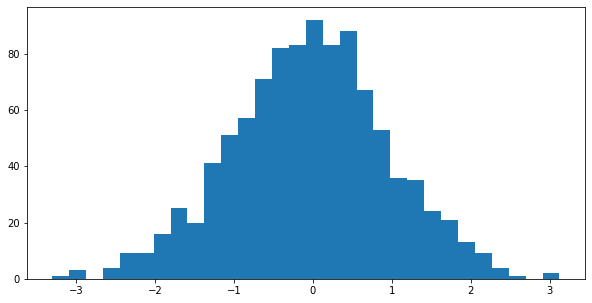

In [ ]:
alpha = tmp_logit.stan_variable(var='alpha')

plt.figure(figsize=(10,5))
plt.hist(alpha, bins=30)
plt.show()

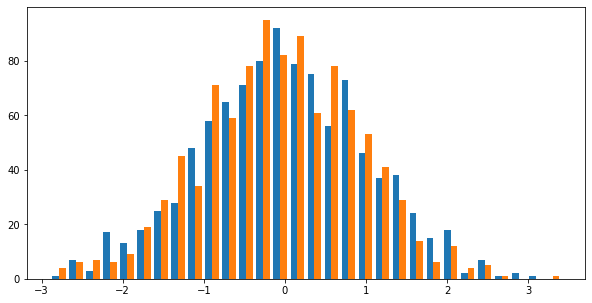

In [ ]:
beta = tmp_logit.stan_variable(var='beta')

plt.figure(figsize=(10,5))
plt.hist(beta, bins=30)
plt.show()

In [ ]:
az.summary(tmp_logit, var_names=['alpha', 'beta'], kind='stats')

,mean,sd,hdi_3%,hdi_97%
alpha,-0.042,0.991,-1.934,1.805
beta[0],0.003,1.022,-2.162,1.754
beta[1],-0.061,0.971,-1.874,1.696


In the first stan file, we will use an array that will contain the *protocol_type* and *service* values. **The model will rely on these parmeters to find solutions and search for connections marked as attack or normal**.



In [ ]:
with open('drive/MyDrive/STAN/stan_fit.stan') as file:
    print(file.read())

data {
	int<lower=1> N;
	int<lower=1> M;
	matrix[N, M] X;
	int<lower=0, upper =1> y[N];
}


transformed data {
	vector[N] ones_N = rep_vector(1,N);
}

parameters {
	vector[M] beta;
	real alpha;
}


model {
	beta ~normal(0, 1);
	alpha ~normal(0, 1);
	y ~bernoulli_logit(X*beta + alpha);
}

generated quantities {
	int y_ppc[N] = bernoulli_logit_rng(X*beta + ones_N*alpha);
	vector[N] prob_ppc = inv_logit(X*beta + ones_N*alpha);
	
}


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


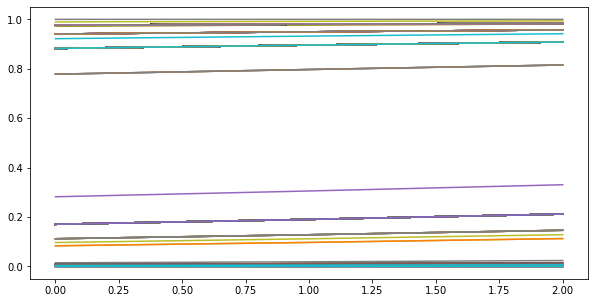

In [ ]:
model = CmdStanModel(stan_file='drive/MyDrive/STAN/stan_fit.stan')
data_dict = dict(N = N,
                 M = 2,
                 X = tmp.iloc[:,1:3].values,
                 y = y
                 )
R = 1000
fit = model.sample(data=data_dict,
                           seed=22052022)

med_prob_ppc = np.percentile(fit.stan_variable('prob_ppc'),[25,50,75],axis=0)

plt.figure(figsize=(10,5))
plt.plot(med_prob_ppc)
plt.show()



In [ ]:
fit.diagnose()

'Processing csv files: /tmp/tmp3h3aavux/stan_fit-20220619122239_1.csv, /tmp/tmp3h3aavux/stan_fit-20220619122239_2.csv, /tmp/tmp3h3aavux/stan_fit-20220619122239_3.csv, /tmp/tmp3h3aavux/stan_fit-20220619122239_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory for all transitions.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.\n'

In [ ]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-185.403000,0.029212,1.138230,-187.631000,-185.108000,-184.120000,1518.26,122.452,0.999588
beta[1],-6.631450,0.008398,0.371766,-7.262570,-6.623760,-6.028060,1959.83,158.066,1.000320
beta[2],0.156701,0.000278,0.012046,0.137240,0.156550,0.176821,1874.96,151.221,1.000280
alpha,1.735210,0.008052,0.331457,1.193980,1.732050,2.298290,1694.33,136.653,1.000590
y_ppc[1],0.202250,0.006432,0.401728,0.000000,0.000000,1.000000,3900.82,314.612,0.999897
...,...,...,...,...,...,...,...,...,...
prob_ppc[996],0.894652,0.000346,0.019023,0.861367,0.895855,0.924050,3017.48,243.369,0.999925
prob_ppc[997],0.980020,0.000124,0.005353,0.970355,0.980488,0.988015,1868.97,150.738,1.000710
prob_ppc[998],0.980020,0.000124,0.005353,0.970355,0.980488,0.988015,1868.97,150.738,1.000710


As results, we obtained averages for each variable, beta coefficients (calculated weights for values from the columns on which the model is based). It is worth focusing on the value of y_ppc, which in this case informs us about the higher number of normal type connections found. This is consistent with the data that was analyzed in the pre-processing section.

In [ ]:
idata = az.from_cmdstanpy(
    posterior=fit,
    posterior_predictive=["y_ppc"], 
    observed_data={"y": y},
)

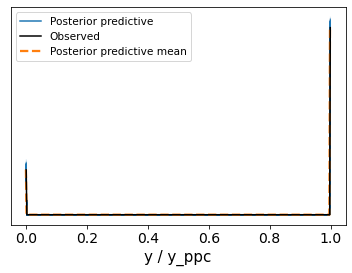

In [ ]:
az.plot_ppc(idata, data_pairs={"y": "y_ppc"})
plt.show()



The image above shows the ratio of real values to those obtained by the model.

In [ ]:
az.summary(fit, var_names=['alpha', 'beta'], kind='stats')

,mean,sd,hdi_3%,hdi_97%
alpha,1.735,0.331,1.096,2.344
beta[0],-6.631,0.372,-7.374,-5.965
beta[1],0.157,0.012,0.134,0.179


### For the second model:

In the second stan file, we will use only a vector obtained informations from *flag* column. We know that flags are not allowed us to rate if the connection is normal or attack type. That's why we want to provide that in this case model will not be good enough.

In [ ]:
with open('drive/MyDrive/STAN/new_stan_fit.stan') as file:
    print(file.read())

data {
  int N;  // number of items
  int y[N];  // binary outcome for item n
  real X[N];  // predictive feature for item n
}

parameters {
  real alpha;
  real beta[N];
}

model {
  alpha ~ normal(0,1);
  for (n in 1:N){
    beta[n] ~ normal(0, 1);
  }
  
  for (n in 1:N){
    y[n] ~ bernoulli(inv_logit(alpha + beta[n] * X[n]));
  }
}

generated quantities {
  int y_rep[N];
  for (n in 1:N){
    y_rep[n] = bernoulli_logit_rng(alpha + beta[n] * X[n]);
  } 
}


In [ ]:
single_model = CmdStanModel(stan_file='drive/MyDrive/STAN/new_stan_fit.stan')
single_data_dict = dict(N = N,
                 X = tmp.iloc[:,3].values, # Use only flags
                 y = y
                 )
R = 1000
single_fit = single_model.sample(data=single_data_dict,
                           seed=22052022)

INFO:cmdstanpy:compiling stan file /content/drive/MyDrive/STAN/new_stan_fit.stan to exe file /content/drive/MyDrive/STAN/new_stan_fit
INFO:cmdstanpy:compiled model executable: /content/drive/MyDrive/STAN/new_stan_fit
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [ ]:
single_fit.diagnose()

'Processing csv files: /tmp/tmp3h3aavux/new_stan_fit-20220619123611_1.csv, /tmp/tmp3h3aavux/new_stan_fit-20220619123611_2.csv, /tmp/tmp3h3aavux/new_stan_fit-20220619123611_3.csv, /tmp/tmp3h3aavux/new_stan_fit-20220619123611_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory for all transitions.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.\n'

In [ ]:
single_fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-631.443000,0.607227,23.187500,-669.937000,-630.589000,-594.156000,1458.16,33.1114,1.001210
alpha,5.304400,0.006477,0.331921,4.751320,5.304780,5.858460,2625.98,59.6301,1.000250
beta[1],-1.183310,0.009614,0.557020,-2.225710,-1.084300,-0.460323,3356.63,76.2214,1.001130
beta[2],0.471193,0.011083,0.733670,-0.560970,0.375296,1.816000,4382.23,99.5105,1.000280
beta[3],0.278980,0.010498,0.821081,-0.940294,0.210773,1.719870,6117.48,138.9140,1.000140
...,...,...,...,...,...,...,...,...,...
y_rep[996],0.950500,0.003437,0.216937,1.000000,1.000000,1.000000,3983.56,90.4576,1.000830
y_rep[997],0.955500,0.003158,0.206229,1.000000,1.000000,1.000000,4265.12,96.8511,0.999668
y_rep[998],0.950250,0.003439,0.217455,1.000000,1.000000,1.000000,3997.97,90.7849,1.000200


Just as we assumed - basing the model on information that is not related to the type of attacks will not yield a model that is somehow able to categorize network connections.

In [ ]:
idata = az.from_cmdstanpy(
    posterior=single_fit,
    posterior_predictive=["y_rep"], 
    observed_data={"y": y},
)

In [ ]:
az.summary(single_fit, var_names=['alpha', 'beta'], kind='stats')

,mean,sd,hdi_3%,hdi_97%
alpha,5.304,0.332,4.661,5.919
beta[0],-1.183,0.557,-2.246,-0.301
beta[1],0.471,0.734,-0.739,1.812
beta[2],0.279,0.821,-1.216,1.739
beta[3],-0.955,0.987,-2.770,0.866
...,...,...,...,...
beta[995],0.271,0.801,-1.096,1.804
beta[996],0.471,0.723,-0.690,1.836
beta[997],0.456,0.716,-0.727,1.785
beta[998],0.272,0.825,-1.128,1.916


# 3. Model comparison 

We used the values from the protocol_type and service columns to construct the first model. We obtained a model that approximated the results as network connections much better than the second model. You can see that the average of the difference of the real values from the predicted values before the model is much closer to zero for the first model. The second model, on the other hand, does not have a good enough fit because a vector with flag values is included in the state. Based on the flags alone, we are not able to judge the type of connection, so the results obtained by the second model are much more different from the real ones.

